In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import time

import privarcy as pr

In [101]:
ser = Service('./chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [102]:
url = 'https://www.instagram.com/'
driver.get(url)
time.sleep(3)

## Ïù∏Ïä§ÌÉÄÍ∑∏Îû® Í≤ÄÏÉâÍ≤∞Í≥º url ÎßåÎì§Ïñ¥ÏÑú Ï†ëÏÜç

In [103]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    
    return url

In [104]:
word = 'Ï†úÏ£ºÎèÑÎßõÏßë'
url = insta_searching(word)
driver.get(url)
time.sleep(3)

### Ï≤´ Î≤àÏß∏ Í≤åÏãúÍ∏Ä Ïó¥Í∏∞

In [112]:
# ÌéòÏù¥ÏßÄÏùò ÌÅ¥Î¶≠ÎèôÏûëÏùÑ ÌïòÎäî ÏΩîÎìú
from selenium.webdriver.common.by import By

def select_first(driver):
    first = driver.find_element(By.CSS_SELECTOR, "div._9AhH0")
    first.click()
    time.sleep(3)

select_first(driver)

In [113]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [114]:
import unicodedata

contents = soup.select('div.C4VMK > span')[1].text
contents = unicodedata.normalize('NFC', contents)

contents

IndexError: list index out of range

In [115]:
text= soup.select('div.C4VMK > span')[0].text
text

IndexError: list index out of range

In [116]:
import re

tags = re.findall(r'#[^\sw#,\\]+', contents)
tags

[]

In [117]:
date = soup.select('time.FH9sR.RhOlS.Nzb55')[0]['datetime'][0:10]
date

IndexError: list index out of range

In [118]:
like = soup.select('a.zV_Nj > span')[0].text
like

IndexError: list index out of range

In [119]:
place = soup.select('div.M30cS')[0].text
place

IndexError: list index out of range

In [120]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content) 
    except:
        content = ' '
        
    tags = re.findall(r'#[^\s#,\\]+', content)  
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    try:
        like = soup.select('div.Nm9Fw > a.zV_Nj > span').text
    except:
        like = 0
        
    try: 
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
        
    data = [content, date, like, place, tags]
    return data

get_content(driver)

IndexError: list index out of range

In [ ]:
def move_next(driver):

    right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
    right.click()
    time.sleep(3)

move_next(driver)

In [111]:
temp = []
for i in range(10) :
    temp.append(get_content(driver))
    move_next(driver)

IndexError: list index out of range

In [121]:
for i in range(len(temp)):
    print(temp[i])
    print('-------------',len(temp[i]),'-----------')
    print('----------------------------------------')

## ÏúÑ Í≥ºÏ†ïÏùÑ ÏûêÎèôÏúºÎ°ú Ìï¥Ï£ºÎäî Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥¥Ïûê!!
- Ïõπ ÎìúÎùºÏù¥Î≤ÑÍ∞Ä ÎùÑÏõåÏ†∏ ÏûàÎã§Îäî Í∞ÄÏ†ïÌïòÏóê Í∞ÑÎã®Ìûà Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÏûê!

In [99]:
## ÌéòÏù¥ÏßÄ ÏàòÎ•º ÌååÎùºÎßòÎãàÌÑ∞Î°ú Î∞õÏïÑ for Î¨∏ÏùÑ ÎèåÎ†§ ÎΩëÏïÑ ÎÇ¥ÎèÑÎ°ùÌñàÎã§.
def insta_crawling(page):
    results = []
    for i in range(10) :
        results.append(get_content(driver))
        move_next(driver)
    return results

print(insta_crawling(10))

IndexError: list index out of range

In [108]:
ser = Service('./chromedriver.exe')

driver = webdriver.Chrome(service=ser)
time.sleep(2)

In [122]:
def insta_crawling(word, n):
    url = insta_searching(word)
    
    driver.get(url)
    time.sleep(5)
    
    select_first(driver)
    time.sleep(5)
    
    
#     target = n
    results = []
    
    for i in range(n):
        try:
            data = get_content(driver)
            results.append(data)
            move_next(driver)
            
        except:
            time.sleep(2)
            move_next(driver)
            
    return(results)


In [123]:
result_1 = insta_crawling('Ï†úÏ£ºÎèÑÎßõÏßë', 20)

In [124]:
result_1

[['Ï†úÏ£º Ïï†ÏõîÏóê ÏúÑÏπòÌïú ÌòÑÏßÄÏù∏Îì§Ïùò Ï∂îÏ≤ú ÎßõÏßë #jival ÏÇ¨Ïû•ÎãòÏù¥ ÏßÅÏ†ë ÏöîÎ¶¨ÌïòÏãúÎäî Ïï†ÏõîÏùç ÎåÄÌëúÌïòÎäî Î†àÏä§ÌÜ†ÎûëÏã±Ïã±Ìïú Ìï¥ÏÇ∞Î¨ºÍ≥º ÌååÏä§ÌÉÄÏùò ÎßåÎÇ® ÏàòÏ†úÎ°ú ÎßåÎìúÏãúÎäî ÏÇ¨Ïû•ÎãòÏùò Ï†ïÏÑ±ÍπåÏßÄ ÎçîÌï¥Ï†∏ Ï†úÏ£º Ïó¨ÌñâÏãú Íº≠ Îì§Î†§Ïïº ÌïòÎäî ÎßõÏßë Ï§ëÏùò ÎßõÏßëÎ∞îÎã§Î•º Î≥¥Î©∞ Ï¶êÍ∏∞Îäî ÏãùÏÇ¨......Ï£ºÏÜå : Ï†úÏ£º Ï†úÏ£ºÏãú Ïï†ÏõîÏùç Ïï†ÏõîÌï¥ÏïàÎ°ú 212ÏòàÏïΩ : 0507-1485-5050#Ïï†ÏõîÎßõÏßë #Ïï†ÏõîÎßõÏßëÏ∂îÏ≤ú #Ï†úÏ£ºÎßõÏßë #Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú #Ï†úÏ£ºÎèÑÎßõÏßë #Ï†úÏ£ºÎèÑÏó¨Ìñâ #Ï†úÏ£ºÏó¨ÌñâÏΩîÏä§Ï∂îÏ≤ú #Ï†úÏ£ºÎßõÏßëÏΩîÏä§ #Ïï†ÏõîÎßõÏßëÏΩîÏä§ #ÌÅ¨Î¶ºÌååÏä§ÌÉÄ #Ï†úÏ£ºÍ≥µÌï≠Í∑ºÏ≤òÎßõÏßë',
  '2022-01-16',
  0,
  'JIVAL',
  ['#jival',
   '#Ïï†ÏõîÎßõÏßë',
   '#Ïï†ÏõîÎßõÏßëÏ∂îÏ≤ú',
   '#Ï†úÏ£ºÎßõÏßë',
   '#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú',
   '#Ï†úÏ£ºÎèÑÎßõÏßë',
   '#Ï†úÏ£ºÎèÑÏó¨Ìñâ',
   '#Ï†úÏ£ºÏó¨ÌñâÏΩîÏä§Ï∂îÏ≤ú',
   '#Ï†úÏ£ºÎßõÏßëÏΩîÏä§',
   '#Ïï†ÏõîÎßõÏßëÏΩîÏä§',
   '#ÌÅ¨Î¶ºÌååÏä§ÌÉÄ',
   '#Ï†úÏ£ºÍ≥µÌï≠Í∑ºÏ≤òÎßõÏßë']],
 ['..#ÎèôÎ∞±ÏãùÎãπ#Í∞àÎπÑÏÇ¥#ÌïúÎùºÏÇ∞..ÏùºÏùÑ Ï

In [125]:
jeju_insta_df = pd.DataFrame()
file_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx',
             '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']

for fname in file_list:
    fpath = './5_Jeju_Hotplace/files/' + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

In [127]:
jeju_insta_df.shape

(12780, 5)

In [128]:
# ÎÇ¥Ïö©Ïù¥ Í∞ôÏúºÎ©¥ Ï†úÍ±∞ÌïòÎùº
jeju_insta_df.drop_duplicates(subset=['content'], inplace = True)
jeju_insta_df.shape

(8369, 5)

In [130]:
jeju_insta_df.to_excel('./my_files/jeju_no_duplicates.xlsx', index = False)

In [131]:
raw_total = jeju_insta_df.copy()

## ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú Ìï¥Î≥¥Í∏∞

In [132]:
raw_total.columns

Index(['content', 'date', 'like', 'place', 'tags'], dtype='object')

In [134]:
raw_total['tags'][0]

0    ['#Ï†úÏ£ºÎ∂ÑÏãù', '#Ï†úÏ£ºÎßõÏßë', '#Ï†úÏ£ºÎèÑÎßõÏßë', '#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú', '#Ï†úÏ£ºÎèÑÎßõ...
0    ['#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£ºÏó¨Ìñâ', '#Ï†úÏ£ºÎèÑÏó¨Ìñâ', '#Ï†úÏ£ºÍ∞Ä...
0                                                   []
0                                             ['#Ï†úÏ£ºÎèÑ']
Name: tags, dtype: object

In [156]:
raw_total['tags'][0]

pandas.core.series.Series

In [157]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [158]:
tags_total

['#Ï†úÏ£ºÎ∂ÑÏãù',
 '#Ï†úÏ£ºÎßõÏßë',
 '#Ï†úÏ£ºÎèÑÎßõÏßë',
 '#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú',
 '#Ï†úÏ£ºÎèÑÎßõÏßëÏ∂îÏ≤ú',
 '#Ï†úÏ£ºÎèÑ',
 '#Ï†úÏ£ºÎßõÏßë',
 '#Ïö©ÎëêÏïî',
 '#Ïã†Ï†úÏ£ºÎßõÏßë',
 '#Ïó∞ÎèôÎßõÏßë',
 '#Ï†úÏ£ºÏó∞ÎèôÎßõÏßë',
 '#Ïï†ÏõîÎßõÏßë',
 '#Ïó∞ÎèôÏ†úÏ£ºÎ∂ÑÏãù',
 '#Ï†úÏ£ºÍ≥µÌï≠Í∑ºÏ≤òÎßõÏßë',
 '#Ï†úÏ£ºÍ≥µÌï≠ÎßõÏßë',
 '#ÎèîÎ≤†ÍπÄÎ∞•',
 '#Ï†ÑÎ≥µÍπÄÎ∞•',
 '#Ï†úÏ£ºÎèàÍπåÏä§',
 '#jeju',
 '#Ï†úÏ£ºÎèÑÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 '#Ìï®ÎçïÎßõÏßë',
 '#Ï†úÏ£ºÎèÑÏπ¥ÌéòÌà¨Ïñ¥',
 '#Ï†úÏ£ºÏùºÏÉÅ',
 '#Ìï®Îçï',
 '#jejudo',
 '#jeju',
 '#Ï†úÏ£ºÎèÑÎßõÏßë',
 '#Ìï®ÎçïÎßõÏßëÎ¨¥Í±∞Î≤ÑÍ±∞Ïß±',
 '#ÏùºÏÉÅ',
 '#Ï†úÏ£ºÏÇ¥Ïù¥',
 '#Ï†úÏ£ºÎèÑÏÇ¥Ïù¥',
 '#Ìï®ÎçïÌï¥ÏàòÏöïÏû•',
 '#Ìï®ÎçïÏπ¥Ìéò',
 '#Ìï®ÎçïÎßõÏßë',
 '#Ï†úÏ£ºÏπ¥Ìéò',
 '#Ï†úÏ£ºÎèÑÏπ¥Ìéò',
 '#Ï†úÏ£ºÎèÑÎßõÏßëÏ∂îÏ≤ú',
 '#Ï†úÏ£ºÎèÑÎØº',
 '#Ï†úÏ£ºÎèÑÎØºÎßõÏßë',
 '#Ï†úÏ£ºÎèÑÎßõÏßë',
 '#Ï†úÏ£ºÎßõÏßë',
 '#Ï†úÏ£ºÎèÑÏó¨Ìñâ',
 '#ÎèôÎ¨∏ÏãúÏû•',
 '#Ï†úÏ£ºÎèôÎ¨∏ÏãúÏû•',
 '#Ï†úÏ£ºÎèÑÍ∏∞ÎÖêÌíà',
 '#Ï†úÏ£ºÍ∏∞ÎÖêÌíà',
 '#Ï†úÏ£ºÏä§ÎäîÏôÑÎ≤Ω',
 '#Ï†úÏ£ºÎèÑÎßõÏßë',
 '#Ï†úÏ£ºÎßõÏßë',
 '#Ï†úÏ£

In [166]:
# ÎπàÎèÑÏàòÎ•º ÏßëÍ≥ÑÌï¥Ï£ºÎäî Ìï®Ïàò
from collections import Counter

tags_counts = Counter(tags_total)
tags_counts

Counter({'#Ï†úÏ£ºÎ∂ÑÏãù': 76,
         '#Ï†úÏ£ºÎßõÏßë': 3412,
         '#Ï†úÏ£ºÎèÑÎßõÏßë': 3149,
         '#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú': 675,
         '#Ï†úÏ£ºÎèÑÎßõÏßëÏ∂îÏ≤ú': 187,
         '#Ï†úÏ£ºÎèÑ': 2053,
         '#Ïö©ÎëêÏïî': 18,
         '#Ïã†Ï†úÏ£ºÎßõÏßë': 157,
         '#Ïó∞ÎèôÎßõÏßë': 58,
         '#Ï†úÏ£ºÏó∞ÎèôÎßõÏßë': 14,
         '#Ïï†ÏõîÎßõÏßë': 373,
         '#Ïó∞ÎèôÏ†úÏ£ºÎ∂ÑÏãù': 30,
         '#Ï†úÏ£ºÍ≥µÌï≠Í∑ºÏ≤òÎßõÏßë': 231,
         '#Ï†úÏ£ºÍ≥µÌï≠ÎßõÏßë': 207,
         '#ÎèîÎ≤†ÍπÄÎ∞•': 16,
         '#Ï†ÑÎ≥µÍπÄÎ∞•': 84,
         '#Ï†úÏ£ºÎèàÍπåÏä§': 14,
         '#jeju': 749,
         '#Ï†úÏ£ºÎèÑÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥': 1014,
         '#Ìï®ÎçïÎßõÏßë': 97,
         '#Ï†úÏ£ºÎèÑÏπ¥ÌéòÌà¨Ïñ¥': 46,
         '#Ï†úÏ£ºÏùºÏÉÅ': 398,
         '#Ìï®Îçï': 54,
         '#jejudo': 191,
         '#Ìï®ÎçïÎßõÏßëÎ¨¥Í±∞Î≤ÑÍ±∞Ïß±': 15,
         '#ÏùºÏÉÅ': 701,
         '#Ï†úÏ£ºÏÇ¥Ïù¥': 480,
         '#Ï†úÏ£ºÎèÑÏÇ¥Ïù¥': 4,
         '#Ìï®ÎçïÌï¥ÏàòÏöïÏû•': 75,
         '#Ìï®ÎçïÏπ¥Ìéò': 28,
         '#Ï†úÏ

In [171]:
# ÏàúÏÑúÎåÄÎ°ú 50Í∞úÎ•º ÎΩëÏùå
print(len(tags_counts.most_common()))
tags_counts.most_common(50)

19413


[('#Ï†úÏ£ºÎßõÏßë', 3412),
 ('#Ï†úÏ£ºÎèÑÎßõÏßë', 3149),
 ('#Ï†úÏ£ºÏó¨Ìñâ', 3020),
 ('#Ï†úÏ£ºÍ¥ÄÍ¥ë', 2827),
 ('#Ï†úÏ£ºÎèÑ', 2053),
 ('#Ï†úÏ£º', 1538),
 ('#Ï†úÏ£ºÎèÑÏó¨Ìñâ', 1454),
 ('#ÏÑúÍ∑ÄÌè¨ÎßõÏßë', 1330),
 ('#Ï†úÏ£ºÎèÑÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥', 1014),
 ('#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§', 835),
 ('#ÏÑúÍ∑ÄÌè¨', 825),
 ('#jeju', 749),
 ('#ÏùºÏÉÅ', 701),
 ('#Ï†úÏ£ºÌùëÎèºÏßÄÎßõÏßë', 685),
 ('#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú', 675),
 ('#Ï†úÏ£ºÎèÑÌùëÎèºÏßÄÎßõÏßë', 669),
 ('#Ï†úÏ£ºÎèÑÌùëÎèºÏßÄ', 663),
 ('#ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â', 650),
 ('#Ï†úÏ£ºÌùëÎèºÏßÄ', 648),
 ('#ÌòëÏû¨ÎßõÏßë', 602),
 ('#Ï†úÏ£ºÏπ¥Ìéò', 600),
 ('#Ï†úÏ£ºÎèÑÍ∑∏Îû®', 594),
 ('#ÏÑúÍ∑ÄÌè¨ÌùëÎèºÏßÄÎßõÏßë', 593),
 ('', 587),
 ('#ÏÑúÍ∑ÄÌè¨ÌùëÎèºÏßÄ', 577),
 ('#Ï†úÏ£ºÎèÑÎØº', 570),
 ('#ÏÑ≠ÏßÄÏΩîÏßÄ', 556),
 ('#ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥âÎßõÏßë', 545),
 ('#ÏÑ≠ÏßÄÏΩîÏßÄÎßõÏßë', 511),
 ('#ÏÑ†Ìåî', 503),
 ('#Ï†úÏ£ºÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥', 497),
 ('#ÌÜµÍ∞àÏπòÍµ¨Ïù¥', 494),
 ('#Ï†úÏ£ºÌÜµÍ∞àÏπòÍµ¨Ïù¥', 485),
 ('#Ï†úÏ£ºÌï´Ìîå', 483),
 ('#Ï†úÏ£ºÏÇ¥Ïù¥', 480),
 ('#Ï†úÏ£ºÏÑúÍ∑ÄÌè¨ÎßõÏßë', 479),
 

In [179]:
# Î∂àÏö©Ïñ¥ ÏÇ¨Ï†Ñ ÏÉùÏÑ±
STOPWORDS = ['#ÏùºÏÉÅ', '#ÏÑ†Ìåî', '#Ï†úÏ£ºÎèÑ', '#jeju', '#Î∞òÏòÅÍµ¨', '#Ï†úÏ£ºÏûêÏó∞ÎààÏçπ',
'#ÏÑúÍ∑ÄÌè¨ÎààÏçπÎ¨∏Ïã†', '#Ï†úÏ£ºÎààÏçπÎ¨∏Ïã†', '#ÏÜåÌÜµ', '#ÎßûÌåî', '#Ï†úÏ£ºÏÜçÎààÏçπ', '#Ï†úÏ£ºÎ∞òÏòÅÍµ¨',
            '#Ï†úÏ£ºÏùºÏÉÅ', '#Ïó¨Ìñâ', '#Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®', '#ÎààÏçπÎ¨∏Ïã†', '#daily',
            '#Ïπ¥Î©úÎ¶¨ÏïÑÌûê', '#Ï†úÏ£ºÎ©îÏù¥ÌÅ¨ÏóÖ', '#Í∞ÄÏ°±Ïó¨Ìñâ', '#ÏÑúÍ∑ÄÌè¨Î∞òÏòÅÍµ¨']

tag_total_selected = []

for tag in tags_total:
    if not tag in STOPWORDS:
        tag_total_selected.append(tag)
tag_total_selected = Counter(tag_total_selected)
tag_total_selected.most_common(50)

[('#Ï†úÏ£ºÎßõÏßë', 3412),
 ('#Ï†úÏ£ºÎèÑÎßõÏßë', 3149),
 ('#Ï†úÏ£ºÏó¨Ìñâ', 3020),
 ('#Ï†úÏ£ºÍ¥ÄÍ¥ë', 2827),
 ('#Ï†úÏ£º', 1538),
 ('#Ï†úÏ£ºÎèÑÏó¨Ìñâ', 1454),
 ('#ÏÑúÍ∑ÄÌè¨ÎßõÏßë', 1330),
 ('#Ï†úÏ£ºÎèÑÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥', 1014),
 ('#Ï†úÏ£ºÌï´ÌîåÎ†àÏù¥Ïä§', 835),
 ('#ÏÑúÍ∑ÄÌè¨', 825),
 ('#Ï†úÏ£ºÌùëÎèºÏßÄÎßõÏßë', 685),
 ('#Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú', 675),
 ('#Ï†úÏ£ºÎèÑÌùëÎèºÏßÄÎßõÏßë', 669),
 ('#Ï†úÏ£ºÎèÑÌùëÎèºÏßÄ', 663),
 ('#ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥â', 650),
 ('#Ï†úÏ£ºÌùëÎèºÏßÄ', 648),
 ('#ÌòëÏû¨ÎßõÏßë', 602),
 ('#Ï†úÏ£ºÏπ¥Ìéò', 600),
 ('#Ï†úÏ£ºÎèÑÍ∑∏Îû®', 594),
 ('#ÏÑúÍ∑ÄÌè¨ÌùëÎèºÏßÄÎßõÏßë', 593),
 ('', 587),
 ('#ÏÑúÍ∑ÄÌè¨ÌùëÎèºÏßÄ', 577),
 ('#Ï†úÏ£ºÎèÑÎØº', 570),
 ('#ÏÑ≠ÏßÄÏΩîÏßÄ', 556),
 ('#ÏÑ±ÏÇ∞ÏùºÏ∂úÎ¥âÎßõÏßë', 545),
 ('#ÏÑ≠ÏßÄÏΩîÏßÄÎßõÏßë', 511),
 ('#Ï†úÏ£ºÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥', 497),
 ('#ÌÜµÍ∞àÏπòÍµ¨Ïù¥', 494),
 ('#Ï†úÏ£ºÌÜµÍ∞àÏπòÍµ¨Ïù¥', 485),
 ('#Ï†úÏ£ºÌï´Ìîå', 483),
 ('#Ï†úÏ£ºÏÇ¥Ïù¥', 480),
 ('#Ï†úÏ£ºÏÑúÍ∑ÄÌè¨ÎßõÏßë', 479),
 ('#Ï†úÏ£ºÎèÑÎØºÎßõÏßë', 477),
 ('#Ï†úÏ£ºÎèÑÍ¥ÄÍ¥ë', 440),
 ('#Ï†úÏ£ºÏãú', 419)

In [177]:
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
import seaborn as sns

rc('font', family = 'malgun gothic')

In [187]:
tag_count_df = pd.DataFrame(tag_total_selected.most_common(50))
tag_count_df.columns = ['tags', 'counts']
tag_count_df.head()

tag_count_df['tags'].replace('', None, inplace = True)
tag_count_df.dropna(subset = ['tags'], inplace =True)
tag_count_df.head()

tags  counts
0   #Ï†úÏ£ºÎßõÏßë    3412
1  #Ï†úÏ£ºÎèÑÎßõÏßë    3149
2   #Ï†úÏ£ºÏó¨Ìñâ    3020
3   #Ï†úÏ£ºÍ¥ÄÍ¥ë    2827
4     #Ï†úÏ£º    1538

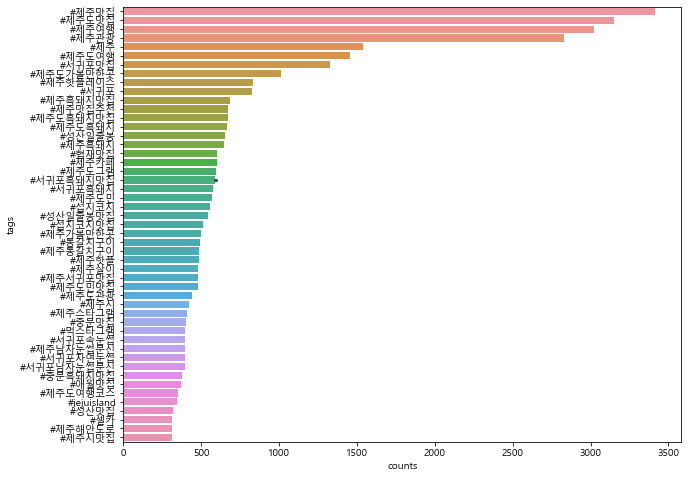

In [189]:
plt.figure(figsize = (10,8))
sns.barplot(x='counts', y='tags',
           data = tag_count_df)
plt.show()

In [190]:
! pip install wordcloud

(-0.5, 799.5, 399.5, -0.5)

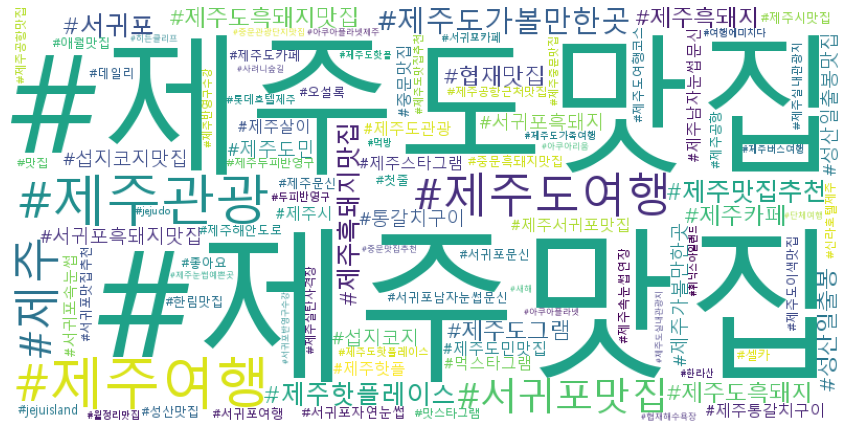

In [195]:
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   #ÏúàÎèÑÏö∞Ïùò Í≤ΩÏö∞
    font_path = "c:/Windows/Fonts/malgun.ttf"

wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_total_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')